In [1]:
import sys
sys.path.append("..")

import os
import math
import json
import cv2

import numpy as np
import pprint as pp
import json as JSON
import pandas as pd
import pandas_gbq

from shapely.geometry import Point, Polygon
from dotenv import load_dotenv
from matplotlib import pyplot as plt

from sid_modules.helperFunctions import BigQueryHelper, ConversionHelper, TestingHelper,  MapsImage, District, Village, OSMBuilding,SIDBuilding

load_dotenv()

bqh = BigQueryHelper()
cnv = ConversionHelper()
ts = TestingHelper()

In [3]:
# import data bases
images_df = bqh.loadImages()
#buildings_df = bqh.loadOSMBuildings()

Downloading: 100%|██████████| 5/5 [00:00<00:00, 28.62rows/s]


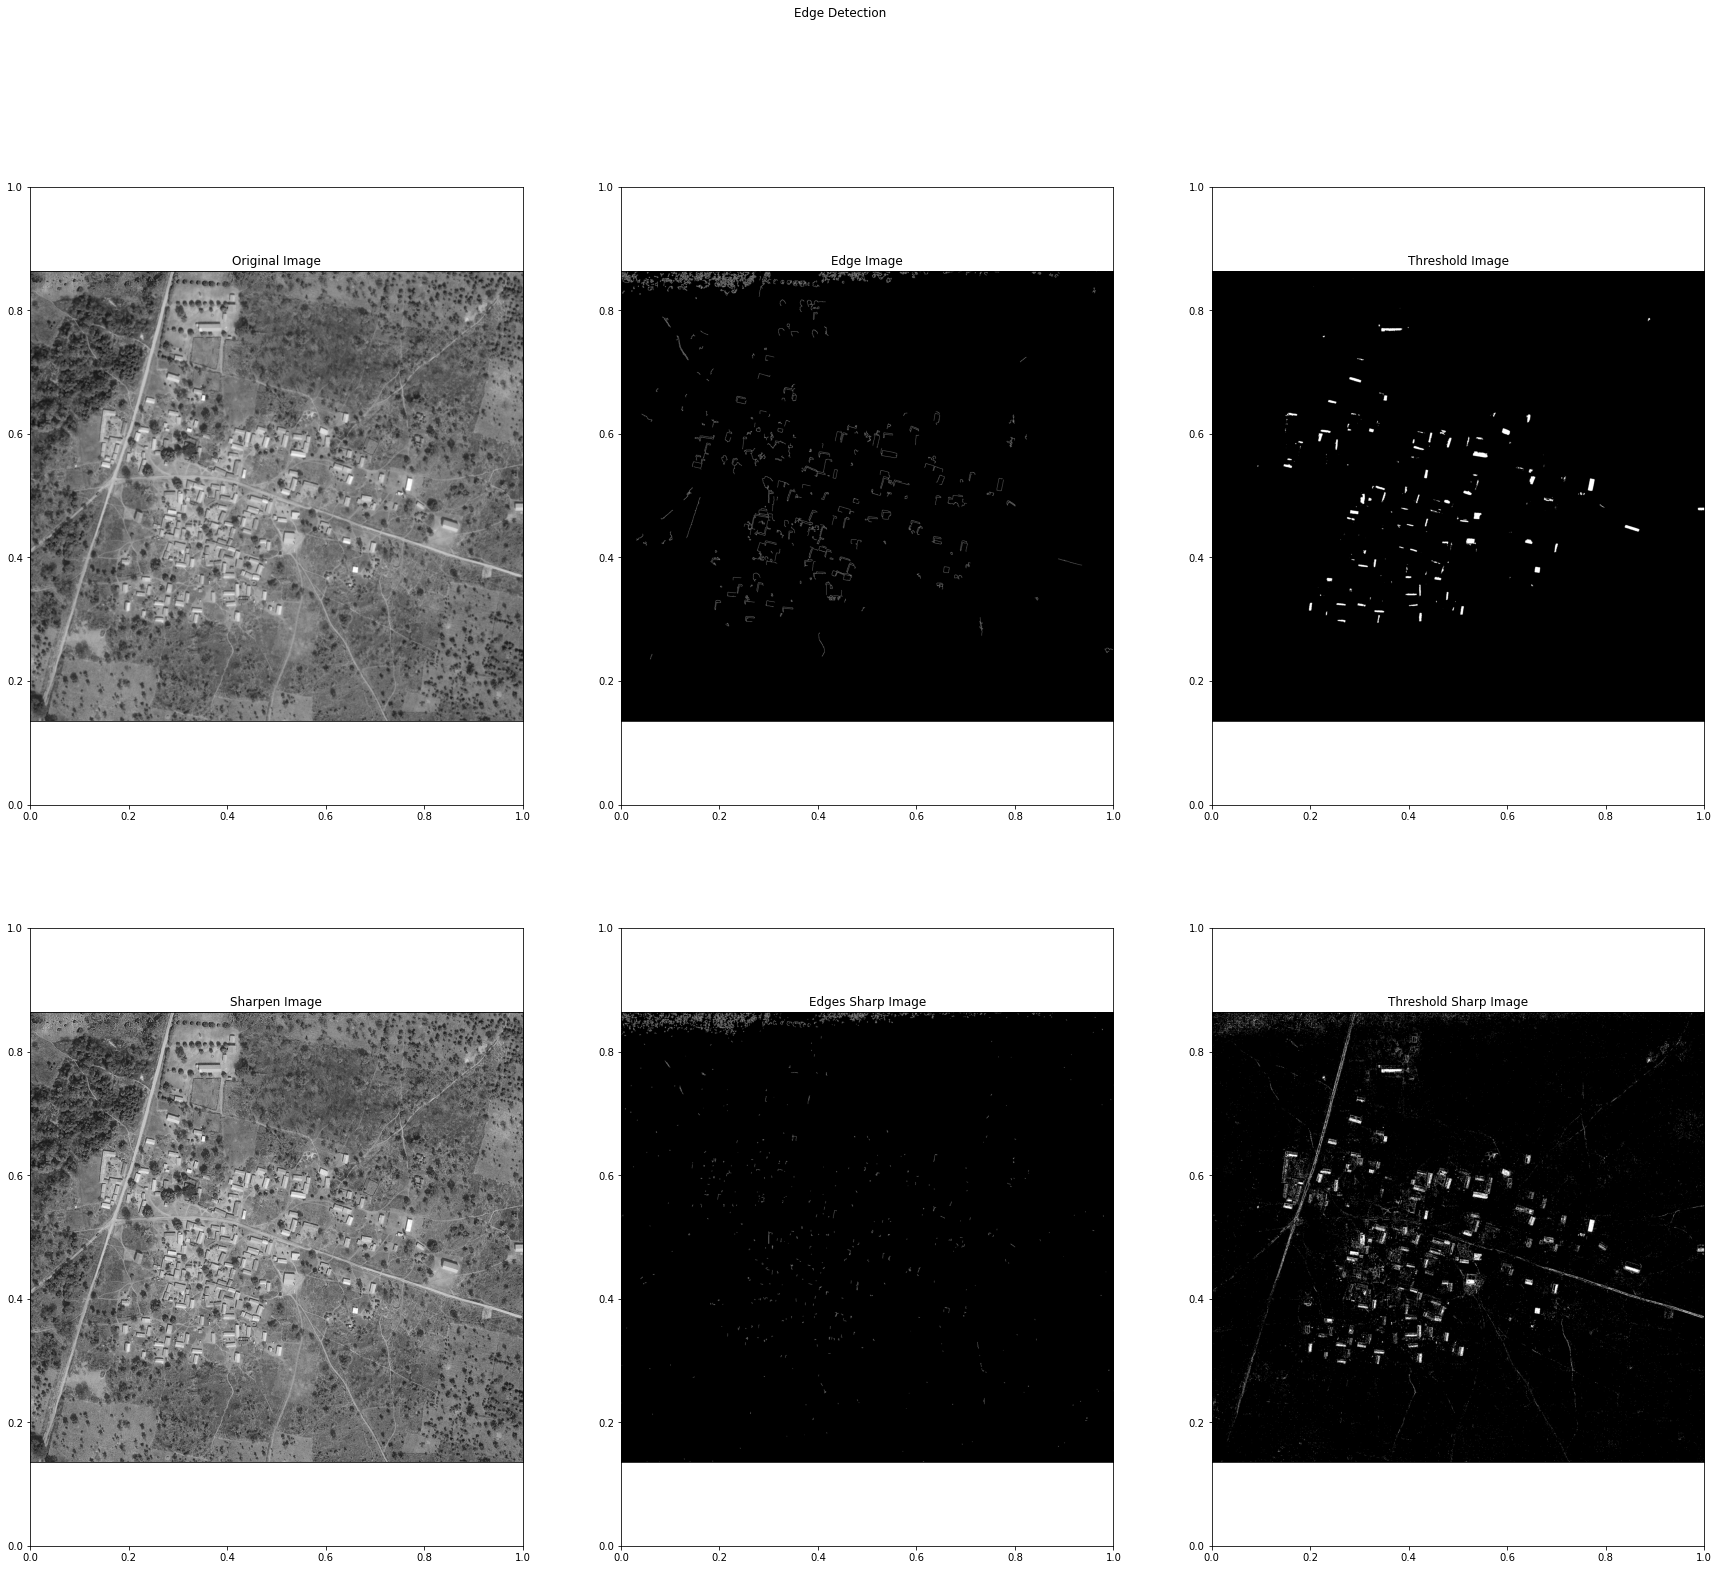

In [5]:
row_ref = images_df.loc[images_df['name'] == 'Monnon']

image_ref = './images/' + row_ref.iloc[0]['img_name']

# Main image
img = cv2.imread(image_ref,0)

# Sharpen image
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_sha = cv2.filter2D(img, -1, kernel)

# Edges in main image
edges = cv2.Canny(img,90,300)

# Edges in sharp image
edges_sha = cv2.Canny(img_sha,900,500)

# threshold in main image
ret,thresh = cv2.threshold(img,200,200,0)
contours = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]

# threshold in sharp image
ret,thresh_sha = cv2.threshold(img_sha,200,200,0)
contours_sha = cv2.findContours(thresh_sha, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]



# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img_sha,cv2.CV_16S,1,0,ksize=5)


"""
print(len(contours))

for contour in contours:
   cv2.drawContours(img, contour, -1, (0, 0, 0), 3)
"""

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 25))
fig.suptitle('Edge Detection')

# Add plot 
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img,cmap = 'gray')
ax1.set_title("Original Image")
ax1.set_xticks([])
ax1.set_yticks([])

# Add plot 
ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(edges , cmap = 'gray')
ax2.set_title("Edge Image")
ax2.set_xticks([])
ax2.set_yticks([])

# Add plot 
ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(thresh , cmap = 'gray')
ax3.set_title("Threshold Image")
ax3.set_xticks([])
ax3.set_yticks([])

# Add plot 
ax4 = fig.add_subplot(2, 3, 4)
ax4.imshow(img_sha , cmap = 'gray')
ax4.set_title("Sharpen Image")
ax4.set_xticks([])
ax4.set_yticks([])

# Add plot 
ax5 = fig.add_subplot(2, 3, 5)
ax5.imshow(edges_sha , cmap = 'gray')
ax5.set_title("Edges Sharp Image")
ax5.set_xticks([])
ax5.set_yticks([])

# Add plot 
ax6 = fig.add_subplot(2, 3, 6)
ax6.imshow(thresh_sha , cmap = 'gray')
ax6.set_title("Threshold Sharp Image")
ax6.set_xticks([])
ax6.set_yticks([])

plt.show()


"\nimg = cv2.imread(image_ref)\nfig, ax = plt.subplots(figsize=(15, 185))\n\nfor build_row in buildings_df.iterrows():\n    if build_row[1]['village'] == 'MONNON':\n        lat_px, lon_px = point_deg_to_px( float(build_row[1]['lat']) , float(build_row[1]['lon']) , row_ref )\n\n        cir = plt.Circle((lon_px, lat_px), 5, color='r')\n\n        ax.add_artist(cir)\n\n\nlat2_px, lon2_px = point_deg_to_px(9.841577, 3.179934, row_ref )\n\n\ncir2 = plt.Circle((lon2_px, lat2_px), 5, color='red')\nax.add_artist(cir2)\n\nax.imshow(img)\n"

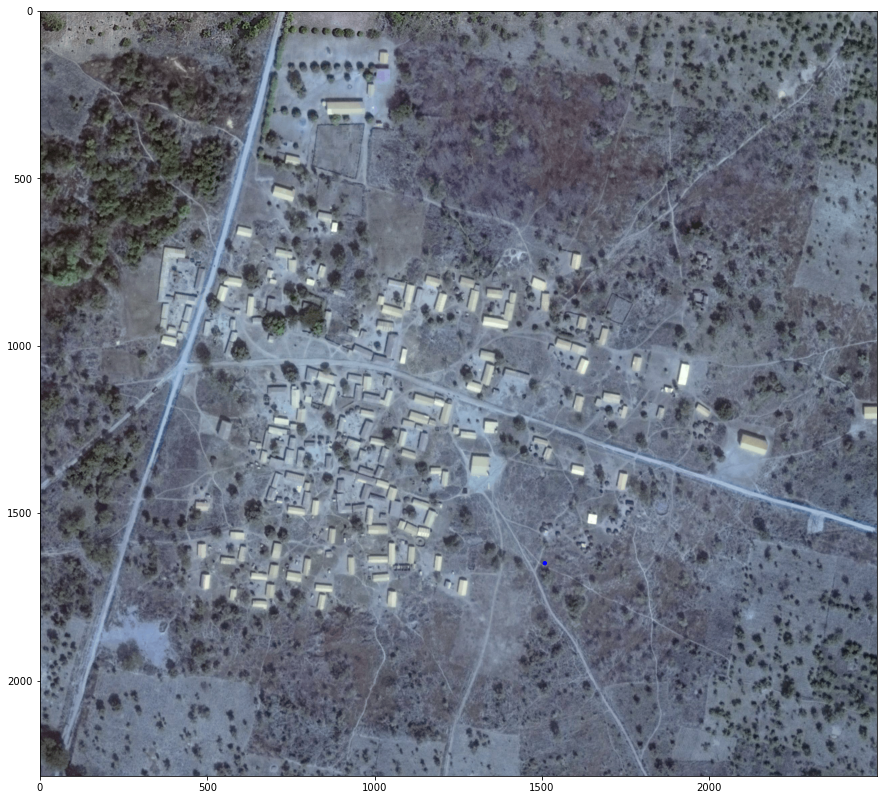

In [4]:
# Testing Conversion Functions

row_ref = images_df.loc[images_df['name'] == 'Monnon']
image_ref = './images/' + row_ref.iloc[0]['img_name']

ts.show_point_in_img(cnv , 9.841577 , 3.179934 , image_ref,row_ref)
